In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import math


In [155]:
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [156]:
titanic.shape

(891, 12)

## Exploring the data

In [157]:
print('no. of passengers ' + str(len(titanic.index)))

no. of passengers 891


<AxesSubplot:xlabel='Survived', ylabel='count'>

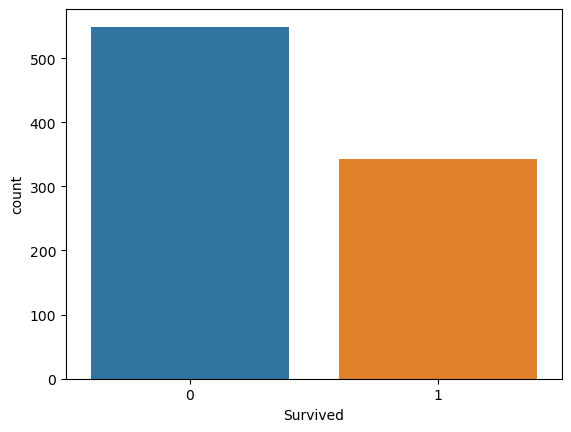

In [158]:
sns.countplot(x = 'Survived', data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

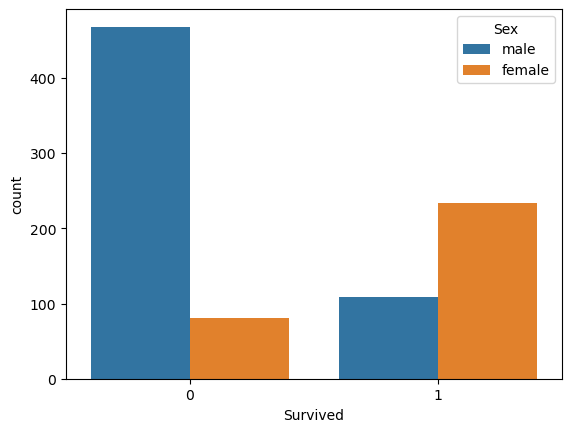

In [159]:
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

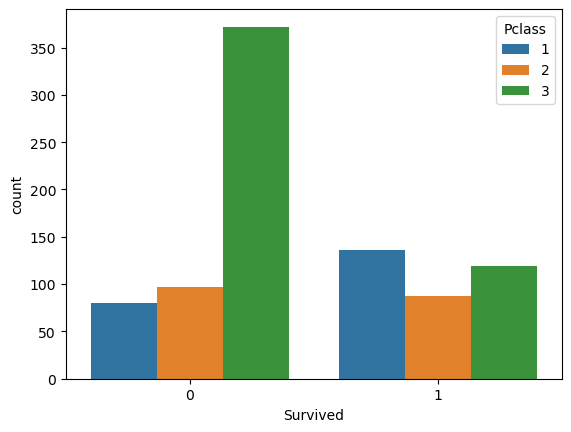

In [160]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic)

<AxesSubplot:ylabel='Frequency'>

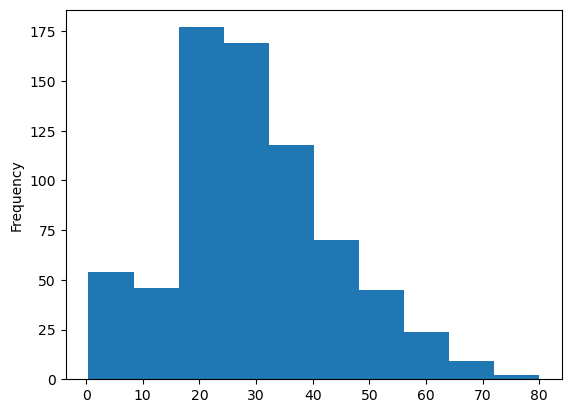

In [161]:
titanic['Age'].plot.hist()

In [162]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [163]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [164]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

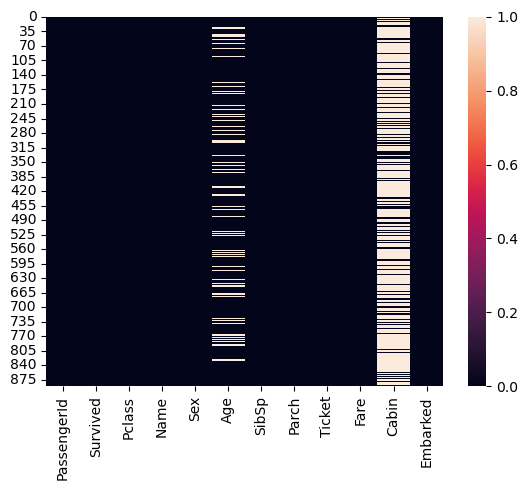

In [165]:
sns.heatmap(titanic.isnull())

<AxesSubplot:>

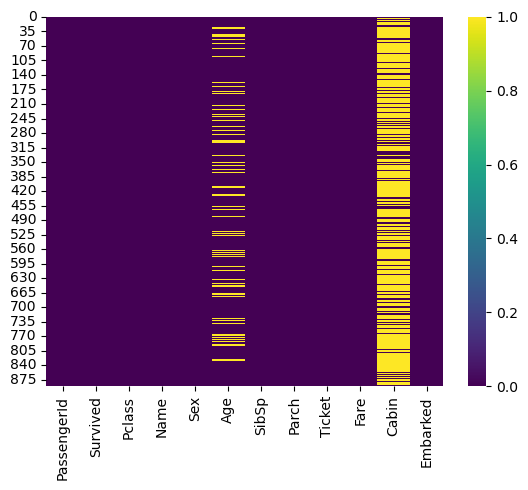

In [166]:
sns.heatmap(titanic.isnull(), cmap = 'viridis')

In [167]:
mean_Age = titanic['Age'].mean()
mean_Age 

29.69911764705882

In [168]:
titanic['Age'].fillna(mean_Age, inplace = True)

In [169]:
# median_Age = titanic['Age'].median()
# median_Age

In [170]:
# mode_Age = titanic['Age'].mode
# mode_Age

In [171]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

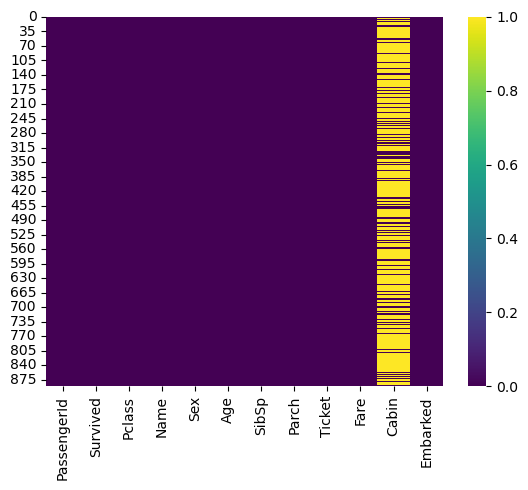

In [172]:
sns.heatmap(titanic.isnull(), cmap = 'viridis')

In [173]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [174]:
titanic['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

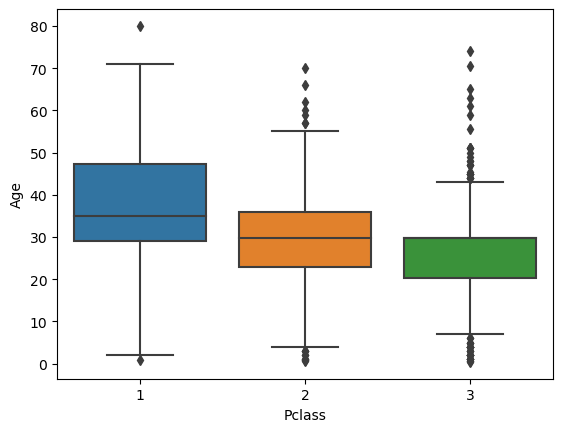

In [175]:
sns.boxplot(x = 'Pclass', y ='Age', data = titanic )

In [176]:
titanic.drop(columns = 'Cabin',inplace = True)

<AxesSubplot:>

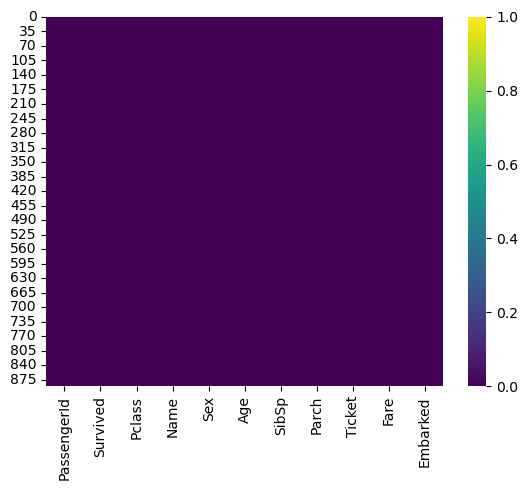

In [177]:
sns.heatmap(titanic.isnull(), cmap = 'viridis')

In [178]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [179]:
sex = pd.get_dummies(titanic['Sex'])

In [180]:
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [181]:
sex = pd.get_dummies(titanic['Sex'], drop_first = True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [182]:
embark = pd.get_dummies(titanic['Embarked'],drop_first = True)

In [183]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [184]:
titanic = pd.concat([titanic, sex, embark],axis = 1)

In [185]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [186]:
titanic.drop(columns = ['PassengerId', 'Name','Sex','Ticket', 'Embarked'], inplace = True)

In [187]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [188]:
X = titanic.drop(columns = 'Survived')

In [189]:
y = titanic['Survived']

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
logmodel = LogisticRegression()

In [194]:
logmodel.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [195]:
predictions = logmodel.predict(X_test)

In [198]:
from sklearn.metrics import accuracy_score

In [199]:
accuracy_score(y_test, predictions)

0.7723880597014925

In [200]:
predictions

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [201]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
114,3,17.000000,0,0,14.4583,0,0,0
874,2,28.000000,1,0,24.0000,0,0,0
76,3,29.699118,0,0,7.8958,1,0,1
876,3,20.000000,0,0,9.8458,1,0,1
674,2,29.699118,0,0,0.0000,1,0,1
...,...,...,...,...,...,...,...,...
715,3,19.000000,0,0,7.6500,1,0,1
767,3,30.500000,0,0,7.7500,0,1,0
72,2,21.000000,0,0,73.5000,1,0,1
235,3,29.699118,0,0,7.5500,0,0,1


In [202]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
862,1,48.000000,0,0,25.9292,0,0,1
223,3,29.699118,0,0,7.8958,1,0,1
84,2,17.000000,0,0,10.5000,0,0,1
680,3,29.699118,0,0,8.1375,0,1,0
535,2,7.000000,0,2,26.2500,0,0,1
...,...,...,...,...,...,...,...,...
247,2,24.000000,0,2,14.5000,0,0,1
551,2,27.000000,0,0,26.0000,1,0,1
239,2,33.000000,0,0,12.2750,1,0,1
484,1,25.000000,1,0,91.0792,1,0,0
